<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import fastcore.all as fc
from nbdevAuto import functions
import os
import glob
import shutil
import numpy as np

In [ ]:
# Specify the directory path
directory_path = 'Data/cifar-10-batches-py'

In [ ]:
class Image:
    def __init__(self, image, label, name, category):
        self.value = image
        self.label = label
        self.name = name
        self.category = category

    def __repr__(self):
        return np.array2string(self.value)

    @property
    def plot(self):
        plt.imshow(self.value)
        plt.axis('off')  # Hide axis
        plt.show()

class Cifar:
    def __init__(self, file_path):
        self.types = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        self.file_path = file_path
        self.full_data = self.data_retrieve()
        self.labels = self.get_labels()
        self.images = self.get_images_data()
        self.filenames = self.get_filenames()
        
        self.items = {self}
    def __len__(self): return len(self.images)
    def __getitem__(self, i): 
        image = Image(self.images[i], self.labels[i], self.filenames[i], self.types[self.labels[i]])
        return image

    def batch_label(self):
        return self.data[b'batch_label']

    def get_labels(self):
        labels = []
        for data in self.full_data:
            labels.extend(data[b'labels'])
        return labels

    def get_images_data(self):
        images = []
        for data in self.full_data:
            reshaped_array = data[b'data'].reshape(len(data[b'data']), 3, 32, 32).astype(np.uint8)
        
            # Transpose the dimensions to get the desired shape (32x32x3)
            reshaped_array = np.transpose(reshaped_array, (0, 2, 3, 1))

            images.extend(reshaped_array)
        images = np.array(images)
        return images
        
    def get_filenames(self):
        filenames = []
        for data in self.full_data:
            filenames.extend(data[b'filenames'])
        return filenames

    def data_retrieve(self):
        import pickle
        data = []
        
        # Use glob to find all files starting with 'data' in the specified directory
        matching_files = glob.glob(f'{self.file_path}/data*')
    
        # Print the list of matching files
        for files in matching_files:
            with open(files, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
            data.append(dict)
    
        return data

In [ ]:
cifar = Cifar(directory_path)

In [ ]:
len(cifar.full_data)

5

In [ ]:
type(cifar.labels), len(cifar.labels)

(list, 50000)

In [ ]:
type(cifar.images), len(cifar.images)

(numpy.ndarray, 50000)

In [ ]:
type(cifar.filenames), len(cifar.filenames)

(list, 50000)

In [ ]:
type(cifar.full_data[1][b'data'])

numpy.ndarray

In [ ]:
cifar.images[1].shape, type(cifar.images[1]),

((32, 32, 3), numpy.ndarray)

In [ ]:
images = np.array(cifar.images)

In [ ]:
images.shape

(50000, 32, 32, 3)

In [ ]:
len(cifar)

50000

In [ ]:
cifar.filenames[1:10]

[b'icebreaker_s_001689.png',
 b'peke_s_000545.png',
 b'convertible_s_000520.png',
 b'domestic_dog_s_000455.png',
 b'broodmare_s_000313.png',
 b'capreolus_capreolus_s_001380.png',
 b'true_cat_s_000886.png',
 b'cruiser_s_000163.png',
 b'ostrich_s_001561.png']

In [ ]:
cifar[1].name

b'icebreaker_s_001689.png'

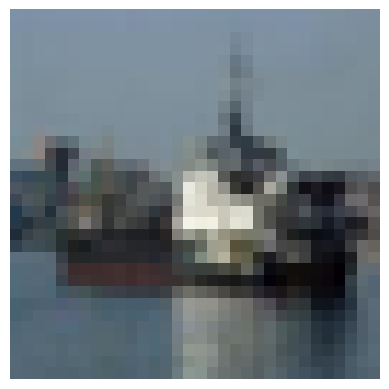

In [ ]:
cifar[1].plot

In [ ]:
cifar[1].category

'ship'

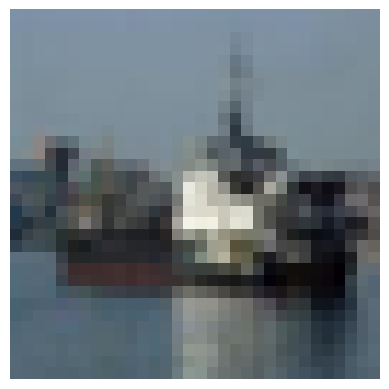

b'icebreaker_s_001689.png'
ship


In [ ]:
# Display the image
plt.imshow(cifar[1].value)
plt.axis('off')  # Hide axis
plt.show()
print(cifar[1].name)
print(cifar[1].category)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with some sample data
df = pd.DataFrame({
    'x': np.linspace(0, 10, 100),
    'y': np.sin(np.linspace(0, 10, 100))
})

In [ ]:
np.array(df[0:50])

array([[ 0.        ,  0.        ],
       [ 0.1010101 ,  0.10083842],
       [ 0.2020202 ,  0.20064886],
       [ 0.3030303 ,  0.2984138 ],
       [ 0.4040404 ,  0.39313661],
       [ 0.50505051,  0.48385164],
       [ 0.60606061,  0.56963411],
       [ 0.70707071,  0.64960951],
       [ 0.80808081,  0.72296256],
       [ 0.90909091,  0.78894546],
       [ 1.01010101,  0.84688556],
       [ 1.11111111,  0.8961922 ],
       [ 1.21212121,  0.93636273],
       [ 1.31313131,  0.96698762],
       [ 1.41414141,  0.98775469],
       [ 1.51515152,  0.99845223],
       [ 1.61616162,  0.99897117],
       [ 1.71717172,  0.98930624],
       [ 1.81818182,  0.96955595],
       [ 1.91919192,  0.93992165],
       [ 2.02020202,  0.90070545],
       [ 2.12121212,  0.85230712],
       [ 2.22222222,  0.79522006],
       [ 2.32323232,  0.73002623],
       [ 2.42424242,  0.65739025],
       [ 2.52525253,  0.57805259],
       [ 2.62626263,  0.49282204],
       [ 2.72727273,  0.40256749],
       [ 2.82828283,

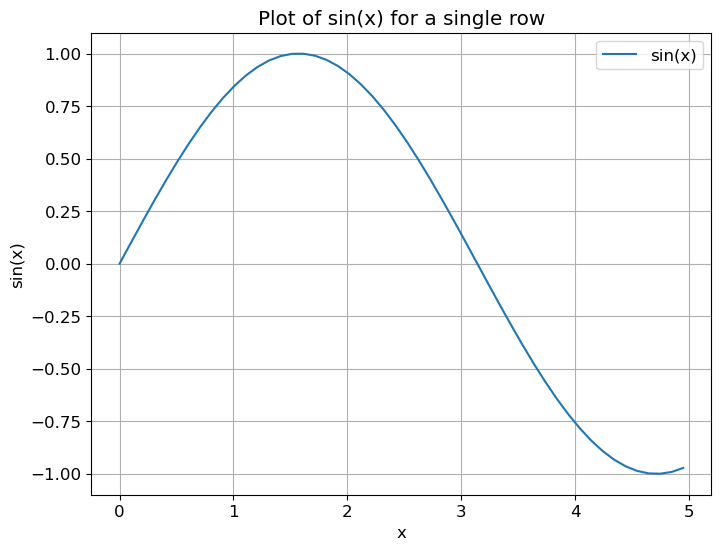

In [ ]:
# Plot the single row using pandas plot method
df[0:50].plot(x='x', y='y', label='sin(x)', figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Plot of sin(x) for a single row')
plt.grid(True)
plt.show()